# Import Packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import xgboost,time
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Check Data

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [6]:
test.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

# Dropping irrelevant column

In [7]:
train = train.drop('ID',axis =1)
test= test.drop('ID',axis=1)

In [8]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


# Treat Target Column Outliers

<AxesSubplot:>

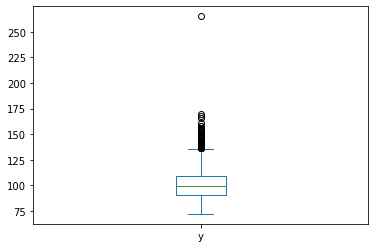

In [10]:
train['y'].plot.box()

In [11]:
Q1 = train['y'].quantile(0.25)
Q3 = train['y'].quantile(0.75)

IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

print(lower_range)
print(upper_range)

63.534999999999975
136.29500000000002


In [12]:
outlier_index = train[(train.y > upper_range)].index
outlier_index

Int64Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,
             900,  995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279,
            1349, 1459, 1730, 2240, 2263, 2348, 2357, 2376, 2414, 2470, 2496,
            2735, 2736, 2852, 2887, 2888, 2905, 2983, 3028, 3090, 3133, 3177,
            3215, 3442, 3744, 3773, 3980, 4176],
           dtype='int64')

# Drop Outliers from Train

In [13]:
train = train.drop(outlier_index)

In [14]:
train.shape

(4159, 377)

# Seprating categorical and numerical data types.

In [15]:
df_num_train = train.select_dtypes(exclude = np.object)
df_cat_train = train.select_dtypes(include = np.object)

df_num_test = test.select_dtypes(exclude = np.object)
df_cat_test = test.select_dtypes(include = np.object)

In [16]:
print('Shape of Cat. Test Data:',df_cat_test.shape)
print('Shape of Num. Test Data:',df_num_test.shape)
print('Shape of Cat. Train Data:',df_cat_train.shape)
print('Shape of Num. Train Data:',df_num_train.shape)

Shape of Cat. Test Data: (4209, 8)
Shape of Num. Test Data: (4209, 368)
Shape of Cat. Train Data: (4159, 8)
Shape of Num. Train Data: (4159, 369)


In [17]:
df_num_test.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
df_cat_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


# If for any column(s),Variance = 0, then remove those variable(s).

In [19]:
# for train data
for i in df_num_train.columns :
    if df_num_train.var()[i] == 0:
        df_num_train.drop(i,axis=1,inplace=True)
        
# for test data
for i in df_num_test.columns :
    if df_num_test.var()[i] == 0:
        df_num_test.drop(i,axis=1,inplace=True)

In [20]:
print('Shape of Num. Test Data:',df_num_test.shape)
print('Shape of Num. Train Data:',df_num_train.shape)

Shape of Num. Test Data: (4209, 363)
Shape of Num. Train Data: (4159, 356)


# Check for null and unique values for test and train sets.

Concat. df_cat & df_num

In [21]:
newtrain = pd.concat([df_num_train,df_cat_train],axis=1)
newtest = pd.concat([df_num_test,df_cat_test],axis=1)

In [22]:
print('Shape of New Test Data:',newtest.shape)
print('Shape of New Train Data:',newtrain.shape)

Shape of New Test Data: (4209, 371)
Shape of New Train Data: (4159, 364)


**`Check for null values`**

In [23]:
for i in newtrain.columns :
    if newtrain[i].isna().value_counts() is True:
        print(newtrain[i])
        
for i in newtest.columns :
    if newtest[i].isna().value_counts() is True:
        print(newtest[i])

So no null values

**`Check for unique values`**

In [24]:
for i in newtrain.columns :
    print(i,':',end="")
    print(newtrain[i].unique())

y :[130.81  88.53  76.26 ...  85.71 108.77  87.48]
X10 :[0 1]
X12 :[0 1]
X13 :[1 0]
X14 :[0 1]
X15 :[0 1]
X16 :[0 1]
X17 :[0 1]
X18 :[1 0]
X19 :[0 1]
X20 :[0 1]
X21 :[1 0]
X22 :[0 1]
X23 :[0 1]
X24 :[0 1]
X26 :[0 1]
X27 :[0 1]
X28 :[0 1]
X29 :[0 1]
X30 :[0 1]
X31 :[1 0]
X32 :[0 1]
X33 :[0 1]
X34 :[0 1]
X35 :[1 0]
X36 :[0 1]
X37 :[1 0]
X38 :[0 1]
X39 :[0 1]
X40 :[0 1]
X41 :[0 1]
X42 :[0 1]
X43 :[0 1]
X44 :[0 1]
X45 :[0 1]
X46 :[1 0]
X47 :[0 1]
X48 :[0 1]
X49 :[0 1]
X50 :[0 1]
X51 :[0 1]
X52 :[0 1]
X53 :[0 1]
X54 :[0 1]
X55 :[0 1]
X56 :[0 1]
X57 :[0 1]
X58 :[1 0]
X59 :[0 1]
X60 :[0 1]
X61 :[0 1]
X62 :[0 1]
X63 :[0 1]
X64 :[0 1]
X65 :[0 1]
X66 :[0 1]
X67 :[0 1]
X68 :[1 0]
X69 :[0 1]
X70 :[1 0]
X71 :[0 1]
X73 :[0 1]
X74 :[1 0]
X75 :[0 1]
X76 :[0 1]
X77 :[0 1]
X78 :[0 1]
X79 :[0 1]
X80 :[0 1]
X81 :[0 1]
X82 :[0 1]
X83 :[0 1]
X84 :[0 1]
X85 :[1 0]
X86 :[0 1]
X87 :[0 1]
X88 :[0 1]
X89 :[0 1]
X90 :[0 1]
X91 :[0 1]
X92 :[0 1]
X94 :[0 1]
X95 :[0 1]
X96 :[0 1]
X97 :[0 1]
X98 :[0 1]
X99 :[0 1]
X10

In [25]:
for i in newtest.columns :
    print(i,':',end="")
    print(newtest[i].unique())

X10 :[0 1]
X11 :[0 1]
X12 :[0 1]
X13 :[0 1]
X14 :[0 1]
X15 :[0 1]
X16 :[0 1]
X17 :[0 1]
X18 :[0 1]
X19 :[0 1]
X20 :[0 1]
X21 :[0 1]
X22 :[0 1]
X23 :[0 1]
X24 :[0 1]
X26 :[0 1]
X27 :[1 0]
X28 :[1 0]
X29 :[1 0]
X30 :[0 1]
X31 :[1 0]
X32 :[0 1]
X33 :[0 1]
X34 :[0 1]
X35 :[1 0]
X36 :[0 1]
X37 :[1 0]
X38 :[0 1]
X39 :[0 1]
X40 :[0 1]
X41 :[0 1]
X42 :[0 1]
X43 :[1 0]
X44 :[0 1]
X45 :[0 1]
X46 :[1 0]
X47 :[0 1]
X48 :[0 1]
X49 :[0 1]
X50 :[0 1]
X51 :[0 1]
X52 :[0 1]
X53 :[0 1]
X54 :[1 0]
X55 :[0 1]
X56 :[0 1]
X57 :[0 1]
X58 :[0 1]
X59 :[0 1]
X60 :[0 1]
X61 :[1 0]
X62 :[0 1]
X63 :[0 1]
X64 :[0 1]
X65 :[0 1]
X66 :[0 1]
X67 :[0 1]
X68 :[0 1]
X69 :[0 1]
X70 :[1 0]
X71 :[0 1]
X73 :[0 1]
X74 :[1 0]
X75 :[0 1]
X76 :[1 0]
X77 :[0 1]
X78 :[0 1]
X79 :[0 1]
X80 :[1 0]
X81 :[0 1]
X82 :[0 1]
X83 :[0 1]
X84 :[0 1]
X85 :[0 1]
X86 :[0 1]
X87 :[0 1]
X88 :[0 1]
X89 :[0 1]
X90 :[0 1]
X91 :[0 1]
X92 :[0 1]
X93 :[0 1]
X94 :[0 1]
X95 :[0 1]
X96 :[1 0]
X97 :[0 1]
X98 :[1 0]
X99 :[0 1]
X100 :[0 1]
X101 :[1 0]
X102 :[0

# Apply label encoder

In [26]:
# for train data
for i in df_cat_train.columns:
    df_cat_train[i] = labelencoder.fit_transform(df_cat_train[i])
df_cat_train

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,16,0,3,24,9,14
1,32,21,18,4,3,28,11,14
2,20,24,33,2,3,27,9,23
3,20,21,33,5,3,27,11,4
4,20,23,33,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,15,2,3,0,3,16
4205,31,16,39,3,3,0,7,7
4206,8,23,37,0,3,0,6,4
4207,9,19,24,5,3,0,11,20


In [27]:
# # for test data
for i in df_cat_test.columns:
    df_cat_test[i] = labelencoder.fit_transform(df_cat_test[i])
df_cat_test

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [28]:
newtrain1 = pd.concat([df_num_train,df_cat_train],axis=1)
newtest1 = pd.concat([df_num_test,df_cat_test],axis=1)

# Divide Data into features and target

In [29]:
features = newtrain1.drop('y',axis=1)
target = newtrain1['y']
# X_test = newtest1

# Train & Validation Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.70, random_state = 3)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (2911, 363)
Shape of y_train: (2911,)
Shape of X_test: (1248, 363)
Shape of y_test: (1248,)


# Perform Dimensionality Reduction (PCA)

In [31]:
pca = PCA(n_components=0.95)

In [32]:
pca.fit(X_train)

PCA(n_components=0.95)

In [33]:
pca.explained_variance_ratio_

array([0.38545701, 0.21176206, 0.13354339, 0.11817431, 0.09057302,
       0.01645431])

In [34]:
np.sum(pca.explained_variance_ratio_)

0.9559640947644873

In [35]:
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [36]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5
0,23.561022,15.422601,-9.550391,-3.074573,3.436354,4.176733
1,-3.825024,0.776333,1.042777,-12.679915,-0.189836,3.678164
2,-14.442352,-5.225660,12.982459,-10.424020,9.888473,6.303518
3,-2.813386,3.263954,-0.921325,11.784038,7.090589,-3.781918
4,3.144741,-9.597645,12.576378,-5.245294,-8.473391,0.034307
...,...,...,...,...,...,...
2906,19.399721,-7.716407,-10.862942,-0.190089,1.057341,-1.199447
2907,5.954690,14.740205,-10.709911,2.746565,-6.159345,1.491938
2908,20.931689,-8.400373,-9.206365,-3.825675,9.945546,-2.348915
2909,-14.709168,-11.149776,3.800036,9.644795,-4.540294,5.558305


# xgboost

In [37]:
xgb_clf = xgboost.XGBRegressor(colsample_bytree= 0.7,
                               learning_rate= 0.03,
                               max_depth= 5,
                               min_child_weight= 4,
                               n_estimators= 200,
                               nthread= 4,
                               subsample= 0.9)

In [38]:
start = time.time()

xgb_clf.fit(X_train,y_train)

end = time.time()
time_elapsed = end - start
print('Time taken:',time_elapsed)

y_pred = xgb_clf.predict(X_test)

Time taken: 3.322930097579956


# Check R Squared

In [39]:
r2_score(y_test,y_pred)

0.6334253267224981